#  Predictive Analytics - Individual Assignment

#### Candidate Number: BSCRI17
#### Word Count: 1,976

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adamax
import warnings
warnings.filterwarnings('ignore')

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Data Preparation and Exploratory Data Analysis](#2.-Data-Preparation-and-Exploratory-Data-Analysis)
    * [2.1. Data Collection](#2.1.-Dataset-Description)
    * [2.2. Exploratory Data Analysis](#2.2.-Exploratory-Data-Analysis)          
    * [2.3. Data Preprocessing](#2.3.-Data-Preprocessing)
* [3. Model Development & Evaluation](#3.-Model-Development-&-Evaluation)
    * [3.1. Model Architecture](#3.1.-Model-Architecture)
    * [3.2. Model Creation](#3.2.-Model-Creation)          
    * [3.3. Model Evalusation & Interpretation](#3.3.-Model-Evalusation-&-Interpretation)
* [4. Model Improvement](#4.-Model-Improvement)
    * [4.1. Hyperparameter Tuning](#4.1.-Hyperparameter-Tuning)
    * [4.2. Feature Engineering](#4.2.-Feature-Engineering)
    * [4.3. Regularisation](#4.3.-Regularization)
    * [4.4. Findings](#4.4.-Findings)
    * [4.5. Final Model](#4.5.-Final-Model)
* [5. Conclusion](#5.-Conclusion)
* [6. References](#6.-References)

<p style="page-break-after:always;"></p>

# 1. Introduction

Unemployment is a crucial economic indicator that has a significant impact on individuals, families, and society. Predicting unemployment can be highly valuable for policymakers, businesses, and individuals, as it enables them to make informed decisions.

In this project, the objective is to predict whether an individual is unemployed or not based on various demographic, socioeconomic, and health-related factors within the 2011 UK census. We will use a neural network approach to train a model that can predict unemployment based on the available data.

First, we will explore the dataset to gain insights into the key features that are strongly associated with unemployment, then preprocessing the data before training a neural network. We will experiment with different numbers of layers and units per layer to determine the best architecture for the data. We will fine-tune the model and explore its failure modes to ensure its accuracy and reliability, before settling on a final version.

The remainder of the report will aim to answer the following question:

##### "How can demographic, socioeconomic, and health-related factors be leveraged to accurately predict an individual's unemployment status using a neural network approach?"

# 2. Data Preparation and Exploratory Data Analysis

### 2.1. Data Collection

#### UK Census 

Data was collected by the ONS and acquired through the UK Data Service, a comprehensive platform which houses the largest collection of economic, social and population data in the UK (UK Data Service, 2023). Data was downloaded as a CSV and imported into a pandas dataframe:

The dataset attained for this analysis is a 5% safeguarded sample extracted from the 2011 UK census. It contains individual-level data of approximately 2.7 million people, covering over 100 variables including age, gender, ethnicity, occupation, education, housing, migration, and health. A breakdown of all variables included, along with a description, is found in Appendix 1. 

The records in the dataset are represented in numeric categories, rather than text. For example, the age variable is categorised into 19 groups, each representing a 5-year period, with the exception of the 16-18 and 90+ age ranges. Breakdowns of the individual category labels for each variable is included in the codebook associated with the data. 
Having the data already in numerical format is beneficial for this project and simplifies the data analysis process of this report, as certain machine learning methods such as decision trees and neural networks require numerical inputs. 



In [2]:
df = pd.read_csv('isg_regionv2.csv')
df.head()

,caseno,country,region,add1yr,age,agehrp,aggdtwpew11g,ahchuk11,carer,carsnoc,...,wg1famuk11,wkpladdewni,wlshread,wlshspeak,wlshstnd,wlshwrit,wpzhome,wrkplaceew,yradindstud,yrarryearg
0,800002,1,1,1,37,46,1,6,1,1,...,2.0,1.0,-9.0,-9.0,-9.0,-9.0,3.0,3.0,0.0,-9.0
1,800080,1,1,2,15,48,-9,4,1,0,...,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0
2,800070,1,1,2,28,28,-9,6,1,1,...,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0
3,800094,1,1,1,33,31,-9,8,1,1,...,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0
4,800085,1,1,1,41,41,8,9,1,1,...,1.0,2.0,-9.0,-9.0,-9.0,-9.0,1.0,2.0,0.0,-9.0


#### Sampled Dataset & Target Variable

We will take a 10% sample from the dataset which was read in from the CSV, which is around 150,000 records. With this many records, this is sufficiently large to be representative of the general population, but is also manageable in terms of computational and time constraints. 

The target variable in this dataframe will be calculated based on the 'empstat', or employability status variable. This is recorded as a 1 if they are employed and a 2 or 3 if they are self-employed. This is transformed into a binary variable with a lambda function which indicates 1 if an individual is unemployed, and 0 if they were employed. Having the target variable as a binary variable simplifies the classification task and can be trained to predict unemployment with greater accuracy.

In [153]:
sample_df = df.sample(frac=0.05)
sample_df['unemployed'] = sample_df['empstat'].apply(lambda x: 0 if x in [1, 2, 3] else 1)
sample_df

,caseno,country,region,add1yr,age,agehrp,aggdtwpew11g,ahchuk11,carer,carsnoc,...,wkpladdewni,wlshread,wlshspeak,wlshstnd,wlshwrit,wpzhome,wrkplaceew,yradindstud,yrarryearg,unemployed
579877,1383193,1,9,-9,20,48,-9,10,-9,3,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,1
1354391,1721175,1,6,1,50,50,3,9,1,3,...,1.0,-9.0,-9.0,-9.0,-9.0,4.0,4.0,0.0,-9.0,0
968247,2229007,1,8,1,38,38,3,8,1,1,...,1.0,-9.0,-9.0,-9.0,-9.0,3.0,3.0,0.0,6.0,0
747765,1440002,1,5,1,69,70,-9,5,1,1,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0,0
360329,2672525,1,10,1,19,51,-9,6,1,1,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42702,1811527,1,10,1,29,49,2,10,1,2,...,1.0,-9.0,-9.0,-9.0,-9.0,3.0,3.0,0.0,-9.0,0
518499,1485397,1,1,1,47,47,5,6,1,2,...,1.0,-9.0,-9.0,-9.0,-9.0,4.0,4.0,0.0,6.0,0
456518,779125,1,3,1,35,35,3,6,4,2,...,1.0,-9.0,-9.0,-9.0,-9.0,3.0,3.0,0.0,-9.0,0
845198,2635163,1,1,1,16,52,-9,10,1,2,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,-9.0,1


#### Feature Selection and Rationale

The feature selection process for this project included selecting variables from the UK census data that could potentially have an impact on whether someone is employed or not. Of the 121 variables in the census dataset, 20 were picked as features for the predictive analysis. 

These were picked based on intuition and further research, and comprise of demographic variables (such as age, sex, ethnicity), socioeconomic variables (such as marital status, highest qualification and deprivation index score), and health variables (such as health status, disability status and carer status). 

Including a wide range of features is useful for training a  neural network as it allows for the model to better understand the underlying structure of the data, which can improve predictive power. 
It is however very important to ensure that variables directly relating to unemployment, such as hours worked per week, are not included in the data. Excluding these from the dataset reduces the risk of overfitting and allows the model to learn more subtle patterns within the data. 

A table of features included is seen below. 

| Variable | Description | Values |
| :--- | :--- | :--- |
| age | Age of the individual | Numeric up intil '90+' |
| carsnoc | Number of cars owned | 5 values including 'None', '1', '4 or more' |
| cobg | Country of birth | 26 values including 'England', 'Middle East', 'Central Asia' etc |
| deprived | Index of multiple deprivation | 5 values describing the number of dimensions the household is deprived in from no dimensions to 4 dimensions |
| marstat | Marital status | 6 values such as 'Married', 'Single', 'Divorced' |
| health | Self-reported health status | 5 values including 'good', 'fair', 'poor'|
| disability | Disability status | 3 values describing day-to-day limitations |
| langprf | English language proficiency |  4 values explaining language proficiency of non-English speakers such as 'very well', 'not well' |
| ethnicityew | Ethnicity | 18 values such as 'White British' 'Black African' etc |
| religionew | Religion | 9 values such as 'Christian', 'Hindu' |
| carer | Carer status | 4 values explaining the amount of hours they care for a dependent each week such as 'Yes, 1-19 hours' |
| hlqupuk11 | Highest Qualification | 6 values such as 'Apprenticeship', 'No academic or professional qualifications' |
| fmspuk11 | Family Status | 9 values such as 'in a lone parent family - parent' |
| dpcfamuk11 | Type of household | 19 values explaining dependencies such as 'One dependent child aged 0-4' |
| scgpuk11c | Social grade | 4 values of social grade - 'AB', 'C1', 'C2', 'DE' |
| sex | Gender | 2 values - 'male' or 'female' |
| student | Student status | 2 values - 'student' or 'non-student' |
| tenduk11 | Ownership of house | 5 values such as 'Owns Outright', 'Rents' |
| typaccom | Accommodation type | 7 values such as  'detached', 'terraced' |
| empstat | Employment status | 3 values on type of employment such as 'employed' |

#### Initial Data Cleaning

As we are looking at unemployment, those who are not of typical working age (18-64) are excluded from the data to create a more representative sample of the working population. We also drop incomplete data here by removing na's from the age group and student columns. 

In [154]:
# Cut down data to only include selected features
selected_features = ['age', 'carsnoc','cobg','deprived', 'marstat', 'health', 'disability', 'langprf', 'ethnicityew', 'religionew', 'carer','hlqupuk11','fmspuk11','dpcfamuk11','scgpuk11c','sex','student','tenduk11','typaccom','unemployed']
df_selected = sample_df[selected_features]

# group age in years of 5 starting from 18
# define the age ranges and labels
age_ranges = [(18, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64)]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

# group age into age ranges
df_selected['age_group'] = pd.cut(df_selected['age'], bins=[r[0] for r in age_ranges]+[age_ranges[-1][1]], labels=age_labels)
df_selected = df_selected.dropna(subset=['age_group','student'])
df_selected = df_selected.drop(['age'], axis=1)
df_selected = df_selected[df_selected['cobg'] != -9]

df_selected.head()

,carsnoc,cobg,deprived,marstat,health,disability,langprf,ethnicityew,religionew,carer,hlqupuk11,fmspuk11,dpcfamuk11,scgpuk11c,sex,student,tenduk11,typaccom,unemployed,age_group
1354391,3,1,1,5,1,3,-9,1,1.0,1,15,3,11,2.0,2.0,2.0,4.0,2.0,0,45-49
968247,1,18,1,2,2,3,1,11,6.0,1,15,3,17,1.0,1.0,2.0,1.0,3.0,0,35-39
360329,1,1,2,1,1,3,-9,1,1.0,1,11,8,6,1.0,1.0,1.0,1.0,2.0,1,18-24
313865,1,9,1,2,1,3,1,12,1.0,1,15,3,1,1.0,2.0,2.0,5.0,4.0,0,25-29
945802,0,1,1,1,3,3,-9,1,2.0,1,12,3,3,3.0,2.0,2.0,3.0,2.0,0,25-29


# 2.2 Exploratory Data Analysis

In [155]:
unemployment_rate = df_selected['unemployed'].mean() * 100
print(f"The overall unemployment rate is {unemployment_rate:.2f}%")

The overall unemployment rate is 4.96%


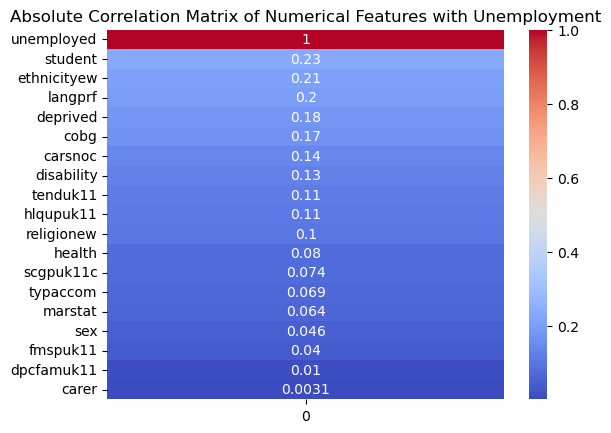

In [51]:
# Calculating correlation matrix for selected features
correlations = df_selected.corrwith(df_selected['unemployed'])
correlations = abs(correlations).sort_values(ascending=False)
sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True)
plt.title('Absolute Correlation Matrix of Numerical Features with Unemployment')
plt.show()

To display the relationships between unemployment and the key features, an absolute correlation matrix has been created. This shows the strength of the relationships between the chosen features and employment status. This shows that the likelihood of being employed is most related to someones student status, ethnicity, and level of deprivation. 
Even though some features have a weaker correlation with unemployment, they may still provide useful information when added to the neural network, so they will still be included. 

#### Feature Exploration

In [251]:
# CREATE SEPERATE DF FOR FEATURE EXPLORATION #

In [258]:
# create a copy of df_selected
df_selected_eda = df_selected.copy()
df_selected_eda = df_selected_eda[['student','ethnicityew','langprf','deprived','carsnoc','health','unemployed']]


carsnoc_labels = {0.0: 'None', 1.0: '1', 2.0: '2', 3.0: '3', 4.0: '4 or more', -9.0: 'Not applicable'}


deprived_labels = {
    1.0: 'Not deprived',
    2.0: 'Deprived in 1 dimension',
    3.0: 'Deprived in 2 dimensions',
    4.0: 'Deprived in 3 dimensions',
    5.0: 'Deprived in 4 dimensions',
    -9.0: 'Not applicable'
}

health_labels = {
    1.0: 'Very good health',
    2.0: 'Good health',
    3.0: 'Fair health',
    4.0: 'Bad health',
    5.0: 'Very bad health',
    -9.0: 'Not applicable'
}

# Create a dictionary with value-label mappings for langprf
langprf_labels = {1.0: 'Very well', 2.0: 'Well', 3.0: 'Not well', 4.0: 'Not at all', -9.0: 'Mother tongue'}

# Define value label information for ethnicityew
ethnicityew_labels = {
    1.0: 'White', 
    2.0: 'White', 
    3.0: 'White', 
    4.0: 'White', 
    5.0: 'Mixed or multiple ethnic groups', 
    6.0: 'Mixed or multiple ethnic groups', 
    7.0: 'Mixed or multiple ethnic groups', 
    8.0: 'Mixed or multiple ethnic groups', 
    9.0: 'Asian or Asian British', 
    10.0: 'Asian or Asian British', 
    11.0: 'Asian or Asian British', 
    12.0: 'Asian or Asian British', 
    13.0: 'Asian or Asian British', 
    14.0: 'Black, Black British, Caribbean or African', 
    15.0: 'Black, Black British, Caribbean or African', 
    16.0: 'Black, Black British, Caribbean or African', 
    17.0: 'Other ethnic group', 
    18.0: 'Other ethnic group', 
    -9.0: 'Not applicable'
}


# Replace values in langprf column with corresponding labels
df_selected_eda['langprf'] = df_selected_eda['langprf'].map(langprf_labels)
df_selected_eda['health'] = df_selected_eda['health'].replace(health_labels)
df_selected_eda['deprived'] = df_selected_eda['deprived'].map(deprived_labels)
df_selected_eda['student'] = df_selected_eda['student'].replace({1.0: 'Yes', 2.0: 'No'})
df_selected_eda['carsnoc'] = df_selected_eda['carsnoc'].map(carsnoc_labels)
df_selected_eda['ethnicityew'] = df_selected_eda['ethnicityew'].map(ethnicityew_labels)
df_selected_eda['unemployed'] = df_selected_eda['unemployed'].replace({0: 'No', 1: 'Yes'})
df_selected_eda

,student,ethnicityew,langprf,deprived,carsnoc,health,unemployed
1354391,No,White,Mother tongue,Not deprived,3,Very good health,No
968247,No,Asian or Asian British,Very well,Not deprived,1,Good health,No
360329,Yes,White,Mother tongue,Deprived in 1 dimension,1,Very good health,Yes
313865,No,Asian or Asian British,Very well,Not deprived,1,Very good health,No
945802,No,White,Mother tongue,Not deprived,None,Fair health,No
...,...,...,...,...,...,...,...
1027929,No,White,Mother tongue,Deprived in 1 dimension,2,Very good health,No
42702,No,White,Mother tongue,Not deprived,2,Good health,No
518499,No,"Black, Black British, Caribbean or African",Mother tongue,Not deprived,2,Very good health,No
456518,No,White,Mother tongue,Deprived in 2 dimensions,2,Good health,No


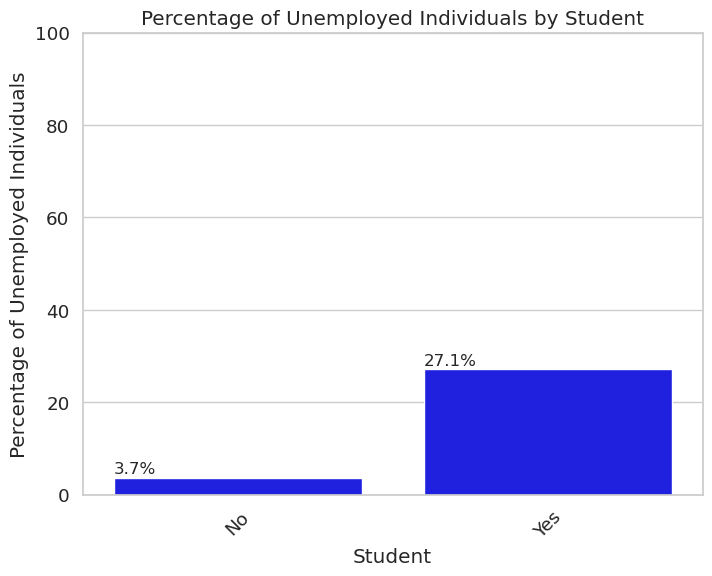

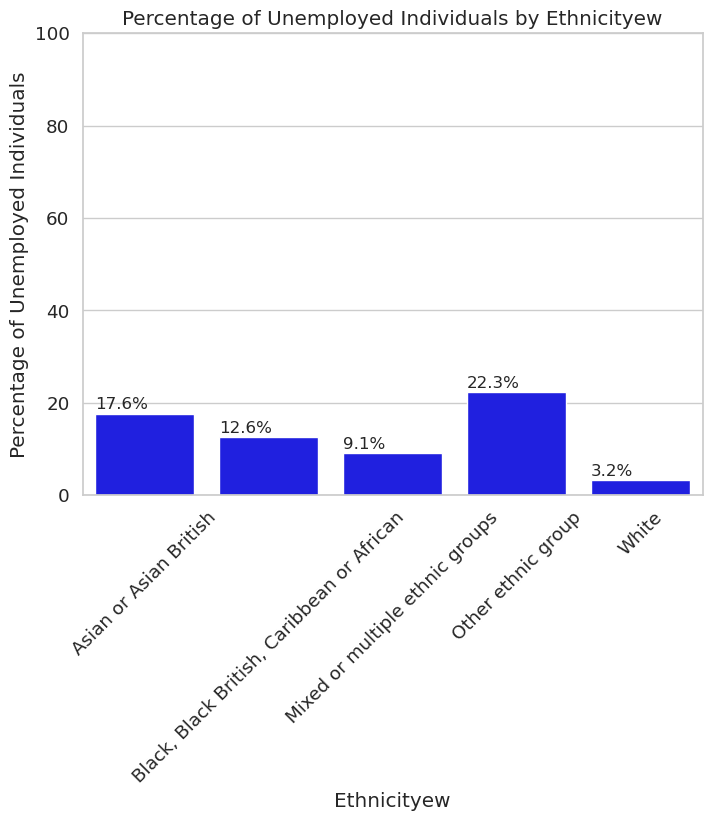

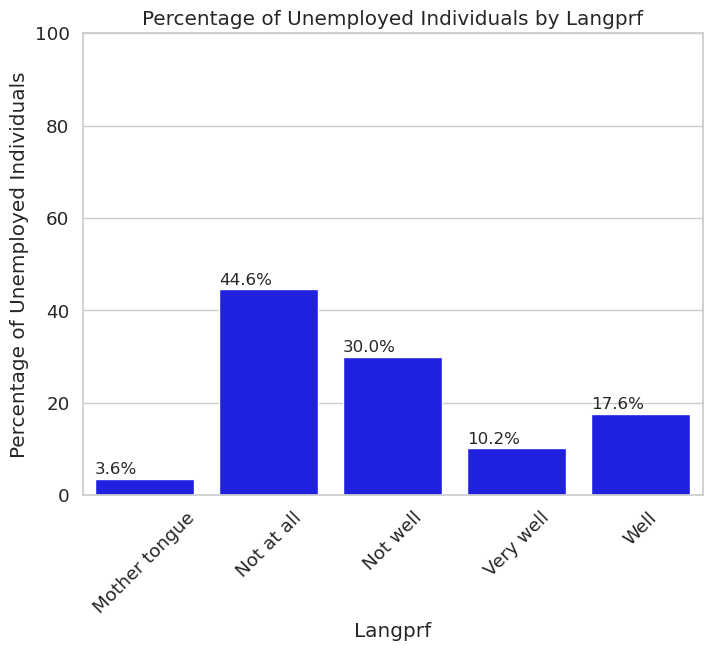

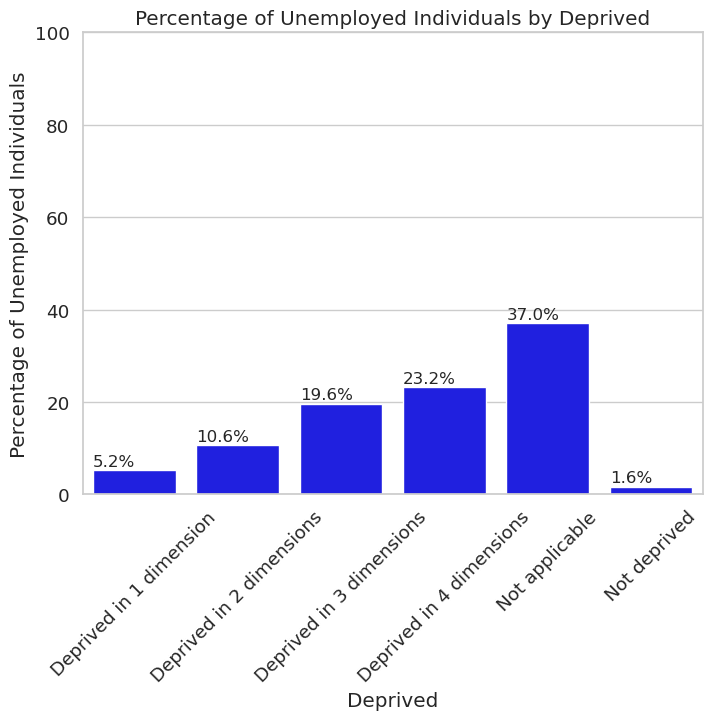

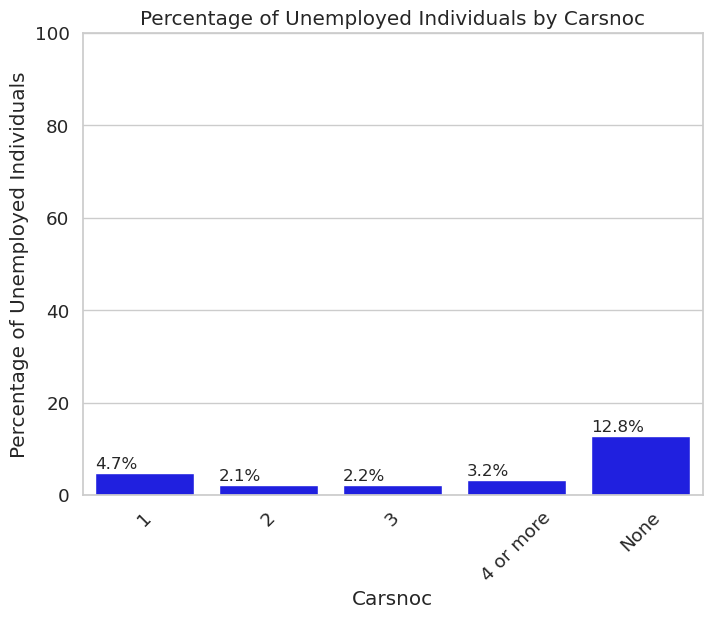

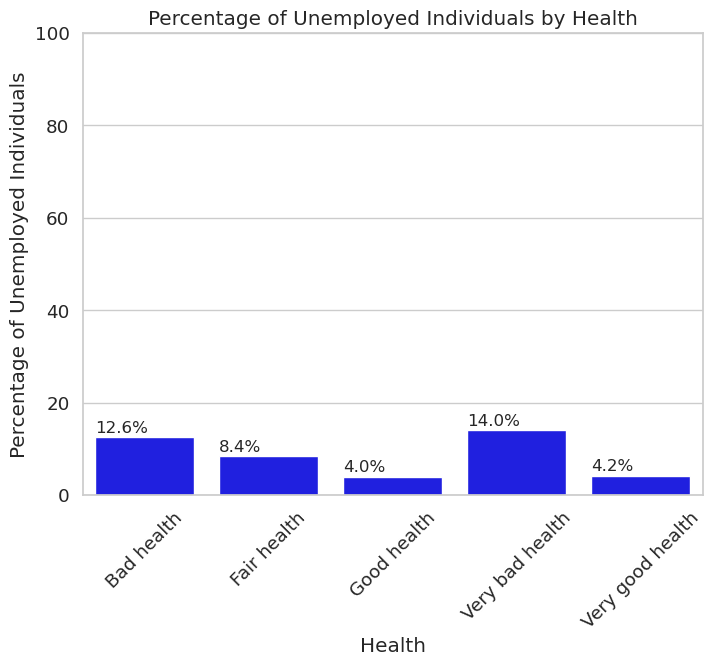

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['student', 'ethnicityew', 'langprf', 'deprived', 'carsnoc', 'health']

for feature in features:
    # Create a new dataframe with the count of employed and unemployed individuals for each feature category
    emp_df = df_selected_eda.groupby([feature, 'unemployed']).size().reset_index(name='count')

    # Pivot the dataframe to show the count of employed and unemployed individuals for each feature category
    pivot_df = emp_df.pivot(index=feature, columns='unemployed', values='count')
    pivot_df.columns = ['Employed', 'Unemployed']

    # Calculate the percentage of unemployed individuals for each feature category and round to 1dp
    pivot_df['Unemployed_Percentage'] = round(pivot_df['Unemployed'] / (pivot_df['Employed'] + pivot_df['Unemployed']) * 100, 1)

    # Set up the figure and axis
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the bar chart to show the percentage of unemployed individuals for each feature category
    sns.barplot(x=pivot_df.index, y='Unemployed_Percentage', data=pivot_df, color='blue', ax=ax)
    plt.xticks(rotation=45)

    # Add labels and title to the plot
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Percentage of Unemployed Individuals")
    ax.set_title(f"Percentage of Unemployed Individuals by {feature.capitalize()}")

    # Set the y-axis limit and add percentage labels to each bar
    ax.set_ylim(top=100)
    for i in ax.patches:
        ax.annotate(str(i.get_height()) + '%', (i.get_x(), i.get_height()+1), fontsize=12)

    # Show the plot
    plt.show()


# 2.3 Data preprocessing

The preprocessing stage involves steps to ensure that the data is in the correct format for the neural network. This will involve cleaning the data to ensure only relevant data is included, before encoding categorical variables into numerical variables through one-hot encoding, as neural networks require numerical inputs with a consistent scale and distribution (Geron, 2019). Once this has been done, data will then be split into training, validation and test sets.

#### Encoding Categorical Variables

To ensure that the neural network is trained on fully numerical data and to understand the correlations within each variable, we undertake one-hot encoding, which creates a binary variable for each category within a categorical feature. This gives us a dataset which has 157 columns and fully prepares us to train a neural network. 

In [161]:
cat_cols = ['age_group','carsnoc','cobg','deprived', 'marstat', 'health', 'disability', 'langprf', 'ethnicityew', 'religionew', 'carer','hlqupuk11','fmspuk11','dpcfamuk11','scgpuk11c','sex','student','tenduk11','typaccom']
# apply one-hot encoding to each categorical column
df_encoded = pd.get_dummies(df_selected, columns=cat_cols)
df_encoded.head()

,unemployed,age_group_18-24,age_group_25-29,age_group_30-34,age_group_35-39,age_group_40-44,age_group_45-49,age_group_50-54,age_group_55-59,age_group_60-64,...,tenduk11_7.0,tenduk11_8.0,tenduk11_9.0,typaccom_1.0,typaccom_2.0,typaccom_3.0,typaccom_4.0,typaccom_5.0,typaccom_6.0,typaccom_7.0
1354391,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
968247,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
360329,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
313865,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
945802,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [157]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
# Select the correlations between each variable and unemployment
unemp_corr = corr_matrix['unemployed']
# Create a dataframe from the correlations
corr_df = pd.DataFrame(unemp_corr).drop('unemployed')
corr_df.columns = ['correlation']
# Sort the correlations by absolute value
corr_df = corr_df.sort_values(by='correlation', ascending=False)
# Display the dataframe
corr_df

,correlation
student_1.0,0.240662
religionew_6.0,0.223212
hlqupuk11_10,0.177266
age_group_18-24,0.175916
carsnoc_0,0.165202
...,...
fmspuk11_3,-0.132192
deprived_1,-0.157254
ethnicityew_1,-0.178639
langprf_-9,-0.188056


The above table shows the top and bottom 5 categories in the encoded dataframe for correlation to unemployment, with the directions introduced.

The positive correlations indicate that unemployment is more related to those who are students, have no qualifications and have lower social class. 

The negative correlations show that those who are not students, those who speak english as their mother tongue, and those who do not live in a deprived household are less likely to be unemployed. 

#### Splitting into Training and Test sets

The sample is split into training and test sets to evalualet the model performance. 
The training set trains the model and the testing set is used to evaluate the performance after it has been trained and tuned. A validation set will be created when running the model, to allow tuning of hyperparameters. 
Following this process will help us to avoid overfitting based on the training data.

In [162]:
# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (31787, 156) (31787,)
Test set shape: (13623, 156) (13623,)


<p style="page-break-after:always;"></p>

# 3. Model Development & Evaluation

## 3.1. Model Architecture

For the unemployment prediction we will be using an artificial neural network (ANN). Specifically, we will use a multilayer perceptron ANN, which consists of multiple layers of nodes including an input layer, one or more hidden layers, and an output layer. This is trained using a backpropogation algorithm to adjust the weights of connections between nodes to minimise the error between predicted and actual outputs. 
In the case of unemployment, this is an effective method to use as it can learn non-linear relationships between the input and output variables.

In this case, the ANN will consist of two hidden layers with 32 and 16 neurons respectively. The input layer will have the same number of neurons as the number of features in the dataset. The output layer will have a single neuron which will predict unemployment probability, and will use an 'ReLU' activation function for hidden layers and 'sigmoid' for the output layer. 

The model will be compiled using binary cross-entropy loss function, which is commonly used in binary classification problems and measures the difference between predicted probability and the true value. 

The Adam optimiser, which is a stochastic gradient descent optimisation algorithm, is then used to adapt the learning rate for each weight in the model based on the gradient and second moment of the gradient. 

The model will then be evaluated for its performance mainly through accuracy and recall as evaluation metrics. 
Accuracy calculates the number of correct predictions as a whole, whereas the recall will calculate the total number of positive predictions out of the total actual positive cases. These will be visualised with a confusion matrix. 

In the case of unemployment, we want to accurately identidy those who are unemployed, whilst minimising the number of false negatives (those unemployed who we predict to be employed).

As there is a low percentage of the population who are unemployed we have a class imbalance, so class weights are introduced to give the minority class more importance, which will lead to the model predicing unemployment more accurately. As employment of our sample is at 5%, we weight Unemployment to {0:0.95, 1:19}.

The model uses Keras with a batch size of 32 and 100 epochs as this gives us a good balance between accuracy and computational efficiency.

## 3.2. Model Creation

In [163]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))


Epoch 1/100
1136/1136 [==============================] - 2s 2ms/step - loss: 0.7281 - accuracy: 0.8288 - val_loss: 0.4610 - val_accuracy: 0.7923
Epoch 2/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.6040 - accuracy: 0.8395 - val_loss: 0.3510 - val_accuracy: 0.8396
Epoch 3/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5780 - accuracy: 0.8439 - val_loss: 0.2689 - val_accuracy: 0.8748
Epoch 4/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5665 - accuracy: 0.8469 - val_loss: 0.4046 - val_accuracy: 0.8159
Epoch 5/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5528 - accuracy: 0.8466 - val_loss: 0.3304 - val_accuracy: 0.8454
Epoch 6/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5405 - accuracy: 0.8506 - val_loss: 0.3509 - val_accuracy: 0.8363
Epoch 7/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5297 - accuracy: 0.8520 - val_loss: 0.2915 - val_ac

## 3.3. Model Evaluation & Interpretation

The confusion matrix, precision recall curve, ROC curve and training/validation loss for the original model are presented below.

Precision: 36.1%
Recall: 94.4%
F1-score: 52.3%


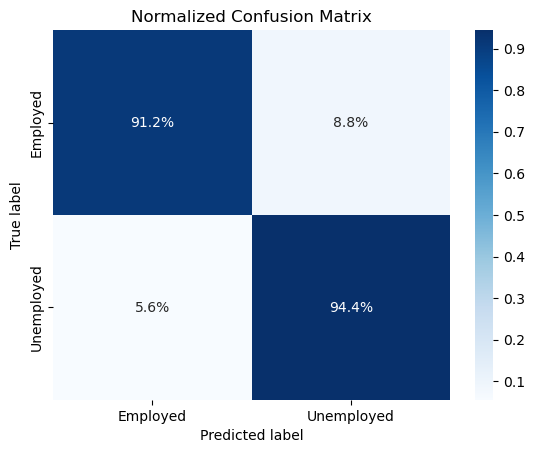

In [164]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

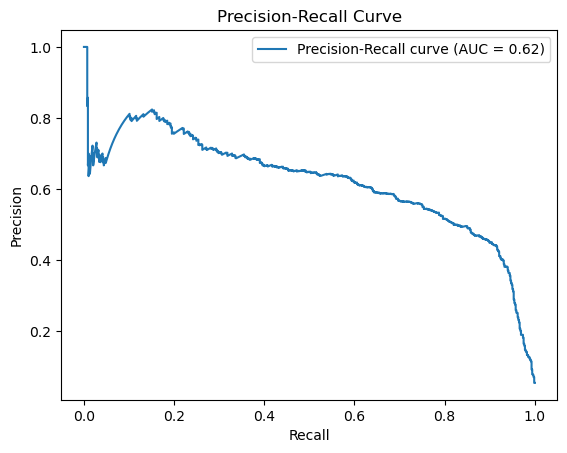

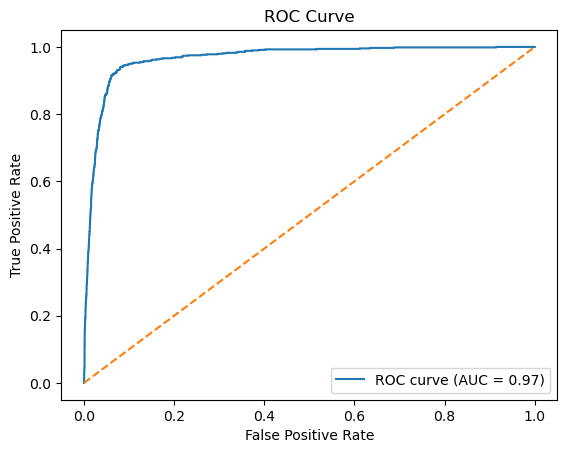

In [165]:
# Calculate precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Create precision-recall curve plot
plt.plot(recall, precision, label='Precision-Recall curve (AUC = {:.2f})'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Create ROC curve plot
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

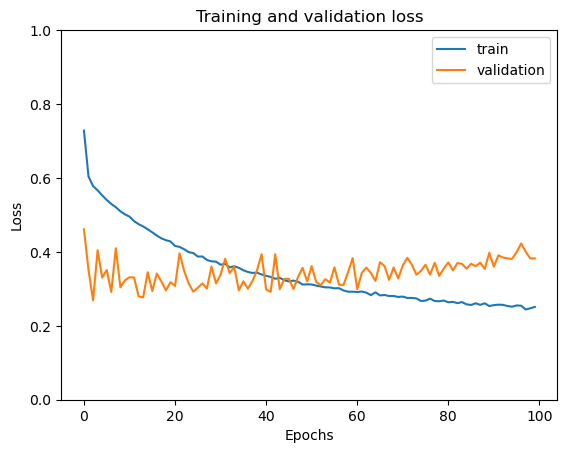

In [166]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

Looking at the confusion matrix, we can see that the model is doing better at predicting the employed individuals (90.3% accuracy) compared to the unemployed individuals (66.5% accuracy). There is also a high number of false negatives (33.5%) which means that the model is incorrectly predicting a significant number of unemployed individuals as employed.

The AUC of 0.35 shows that the model does not distinguish between positive and negative instances very well. The increasing validation loss also suggests that the model is overfitting to the training data, which may mean poor generalisation to new data.

Overall, the model has room for improvement which will be achieved through a mix of hyperparameter tuning and regularisation techniques. 

<p style="page-break-after:always;"></p>

# 4. Model Improvement

## 4.1. Hyperparameter Tuning

#### Use gridsearch to optimize number of neurons and choose best optimizer

In [170]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture
def create_model(neurons=16, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(neurons, input_dim=X.shape[1], activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Create the KerasClassifier for use in scikit-learn
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, class_weight=class_weights, verbose=2)

# Define hyperparameters to search
neurons = [16, 32, 64, 128]
optimizers = ['adam', 'rmsprop']
param_grid = dict(neurons=neurons, optimizer=optimizers)

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')
grid_result = grid.fit(X, y)

# Print results
print("Best F1-score: {:.1%}".format(grid_result.best_score_))
print("Best parameters: {}".format(grid_result.best_params_))


947/947 - 1s - loss: 0.7837 - accuracy: 0.8187 - 1s/epoch - 1ms/step
947/947 - 1s - loss: 0.7722 - accuracy: 0.7845 - 1s/epoch - 1ms/step
947/947 - 1s - loss: 0.7457 - accuracy: 0.7883 - 1s/epoch - 2ms/step
947/947 - 2s - loss: 0.8716 - accuracy: 0.8421 - 2s/epoch - 2ms/step
947/947 - 1s - loss: 0.8158 - accuracy: 0.7922 - 1s/epoch - 2ms/step
947/947 - 1s - loss: 0.8130 - accuracy: 0.8134 - 1s/epoch - 1ms/step
947/947 - 1s - loss: 0.7380 - accuracy: 0.8163 - 1s/epoch - 2ms/step
947/947 - 2s - loss: 0.7342 - accuracy: 0.8219 - 2s/epoch - 2ms/step
947/947 - 1s - loss: 0.7274 - accuracy: 0.8307 - 1s/epoch - 1ms/step
947/947 - 1s - loss: 0.8335 - accuracy: 0.8487 - 1s/epoch - 2ms/step
947/947 - 1s - loss: 0.8031 - accuracy: 0.8277 - 1s/epoch - 2ms/step
947/947 - 1s - loss: 0.7544 - accuracy: 0.8363 - 1s/epoch - 2ms/step
947/947 - 1s - loss: 0.7159 - accuracy: 0.8155 - 1s/epoch - 1ms/step
947/947 - 1s - loss: 0.7212 - accuracy: 0.8091 - 1s/epoch - 2ms/step
947/947 - 1s - loss: 0.7012 - accu

In [193]:
# OPTIMAL NEURONS IS 64 AND BEST OPTIMIZER IS ADAM #

In [197]:
# TRAIN NEW MODEL BASED ON NEW HYPERPARAMETERS #

In [171]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))



Epoch 1/100
1136/1136 [==============================] - 2s 2ms/step - loss: 0.7263 - accuracy: 0.8323 - val_loss: 0.3470 - val_accuracy: 0.8379
Epoch 2/100
1136/1136 [==============================] - 2s 2ms/step - loss: 0.5880 - accuracy: 0.8405 - val_loss: 0.3855 - val_accuracy: 0.8234
Epoch 3/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5550 - accuracy: 0.8456 - val_loss: 0.2888 - val_accuracy: 0.8626
Epoch 4/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.5284 - accuracy: 0.8525 - val_loss: 0.3164 - val_accuracy: 0.8529
Epoch 5/100
1136/1136 [==============================] - 2s 2ms/step - loss: 0.5037 - accuracy: 0.8596 - val_loss: 0.3143 - val_accuracy: 0.8531
Epoch 6/100
1136/1136 [==============================] - 2s 2ms/step - loss: 0.4704 - accuracy: 0.8651 - val_loss: 0.2679 - val_accuracy: 0.8734
Epoch 7/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.4540 - accuracy: 0.8723 - val_loss: 0.3006 - val_ac

In [194]:
# PLOT CONFUSION MATRIX AND TRAINING AND VALIDATION LOSS GRAPH #

Precision: 74.1%
Recall: 89.7%
F1-score: 81.2%


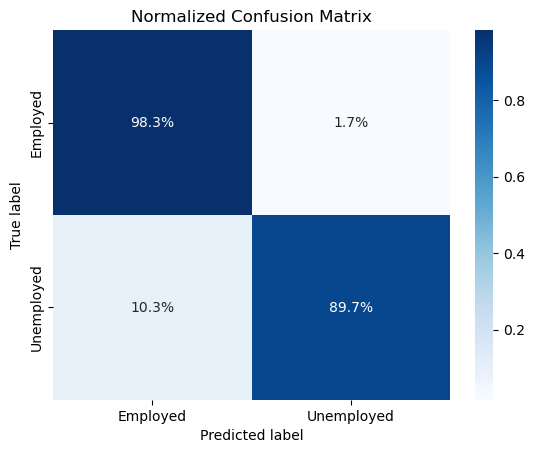

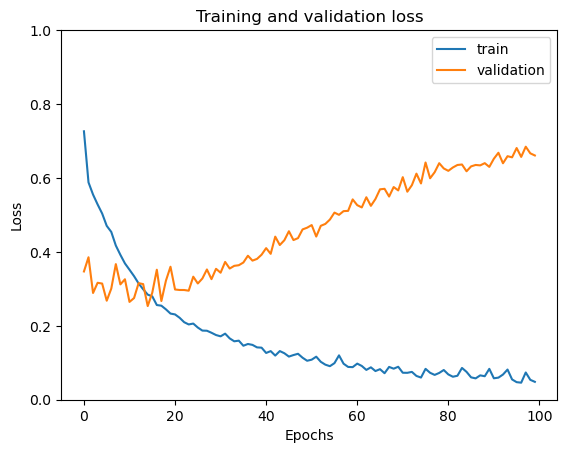

In [172]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [195]:
# MODEL HAS GOOD PREDICTIVE POWER FOR PREDICTING THOSE WHO ARE EMPLOYED
# HOWEVER BASED ON GRAPH IS OVERFITTED 

## 4.2. Feature Engineering

#### Dimensionality Reduction

In [198]:
import numpy as np
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Perform PCA to reduce the number of features
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Define the model architecture with dropout layers
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_pca.shape[1], activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X_pca, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
X_test_pca = pca.transform(X_test)
y_pred_prob = model.predict(X_test_pca)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

Epoch 1/100
1136/1136 [==============================] - 2s 1ms/step - loss: 1.0119 - accuracy: 0.6739 - val_loss: 0.4963 - val_accuracy: 0.7701
Epoch 2/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.8489 - accuracy: 0.7600 - val_loss: 0.3989 - val_accuracy: 0.7952
Epoch 3/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.8293 - accuracy: 0.7651 - val_loss: 0.4687 - val_accuracy: 0.7556
Epoch 4/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.8105 - accuracy: 0.7709 - val_loss: 0.3732 - val_accuracy: 0.8094
Epoch 5/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.8171 - accuracy: 0.7754 - val_loss: 0.4555 - val_accuracy: 0.7660
Epoch 6/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.8057 - accuracy: 0.7776 - val_loss: 0.4063 - val_accuracy: 0.7962
Epoch 7/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.7883 - accuracy: 0.7825 - val_loss: 0.4423 - val_ac

In [200]:
# PLOT CONFUSION MATRIX AND TRAINING AND VALIDATION LOSS GRAPH #

Precision: 19.4%
Recall: 88.6%
F1-score: 31.8%


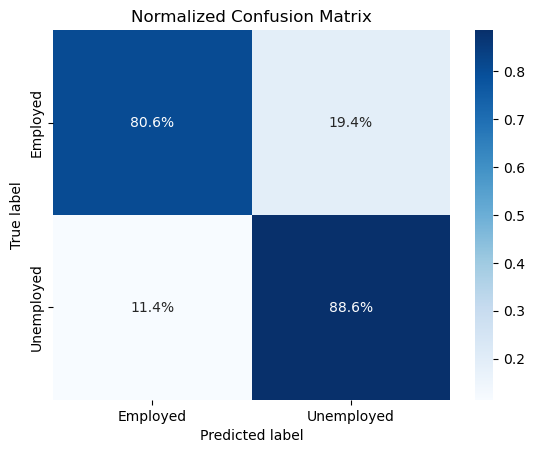

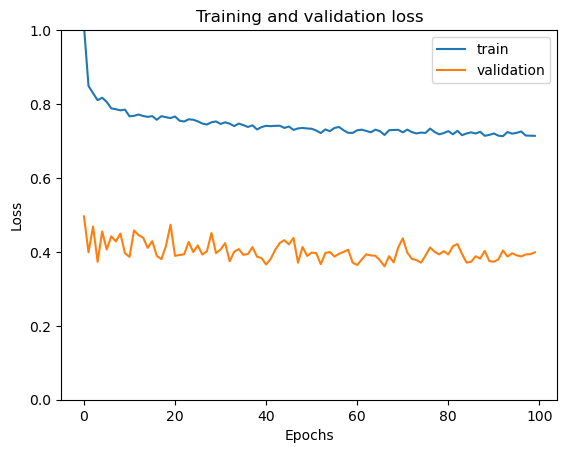

In [199]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [201]:
# IMPACT OF DIMENSIONAL REDUCTION IS LOWER ACCURACY AND RECALL #

## 4.3. Regularization

#### Early Stopping

In [228]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

# Fit the model on training data with validation split and early stopping
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2, callbacks=[early_stopping])

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

Epoch 1/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.7140 - accuracy: 0.8314 - val_loss: 0.4345 - val_accuracy: 0.7977
Epoch 2/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5875 - accuracy: 0.8390 - val_loss: 0.3439 - val_accuracy: 0.8392
Epoch 3/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.8467 - val_loss: 0.3686 - val_accuracy: 0.8316
Epoch 4/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.8525 - val_loss: 0.2979 - val_accuracy: 0.8587
Epoch 5/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.4866 - accuracy: 0.8609 - val_loss: 0.3316 - val_accuracy: 0.8446
Epoch 6/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.8689 - val_loss: 0.2353 - val_accuracy: 0.8954
Epoch 7/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8794 - val_loss: 0.3047 - val_ac

Precision: 36.0%
Recall: 90.3%
F1-score: 51.5%


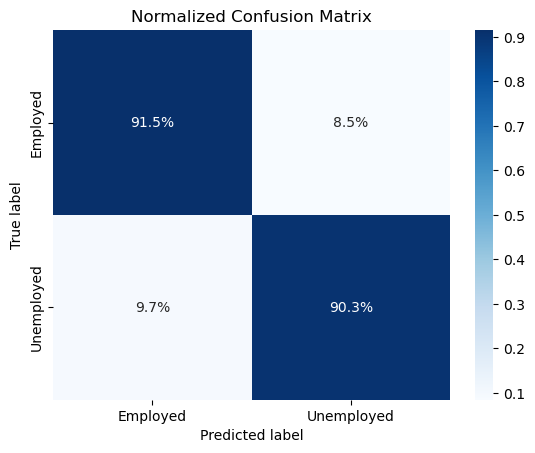

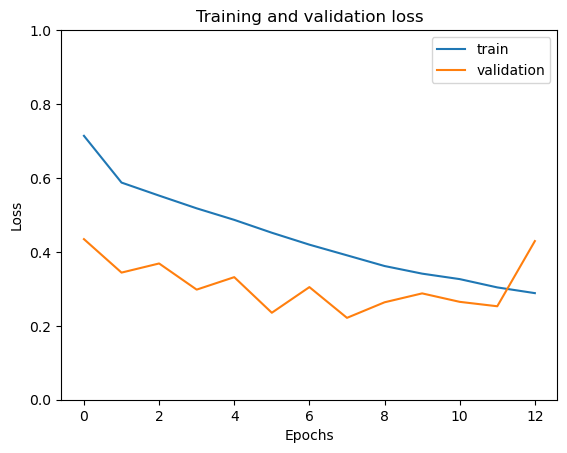

In [229]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

#### L2 Regularization

In [220]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture with dropout layers and L2 regularization
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

Epoch 1/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.7750 - accuracy: 0.8314 - val_loss: 0.4764 - val_accuracy: 0.8265
Epoch 2/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6553 - accuracy: 0.8406 - val_loss: 0.4996 - val_accuracy: 0.8044
Epoch 3/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6271 - accuracy: 0.8462 - val_loss: 0.4345 - val_accuracy: 0.8228
Epoch 4/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.8299
Epoch 5/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5851 - accuracy: 0.8544 - val_loss: 0.3991 - val_accuracy: 0.8430
Epoch 6/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5676 - accuracy: 0.8586 - val_loss: 0.4759 - val_accuracy: 0.8084
Epoch 7/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.8629 - val_loss: 0.3609 - val_ac

In [221]:
# PLOT CONFUSION MATRIX AND TRAINING AND VALIDATION LOSS GRAPH #

Precision: 38.1%
Recall: 94.1%
F1-score: 54.2%


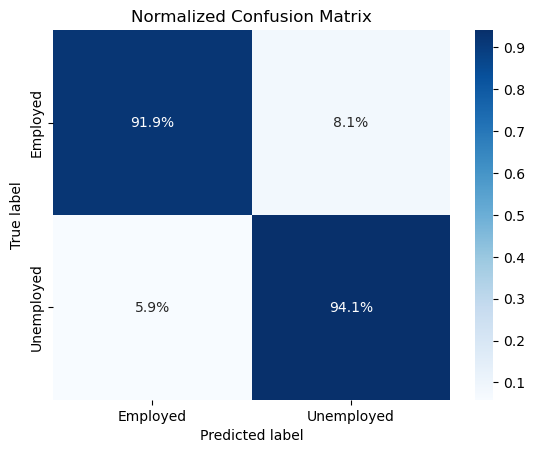

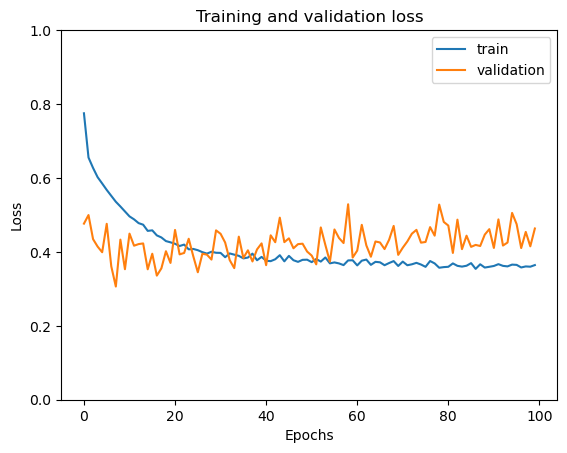

In [222]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

#### Dropout Regularization

In [223]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture with dropout layers
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))


Epoch 1/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.7804 - accuracy: 0.7826 - val_loss: 0.4210 - val_accuracy: 0.7974
Epoch 2/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6543 - accuracy: 0.8256 - val_loss: 0.3735 - val_accuracy: 0.8226
Epoch 3/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6148 - accuracy: 0.8318 - val_loss: 0.3480 - val_accuracy: 0.8287
Epoch 4/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5929 - accuracy: 0.8396 - val_loss: 0.3559 - val_accuracy: 0.8271
Epoch 5/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5712 - accuracy: 0.8416 - val_loss: 0.3303 - val_accuracy: 0.8402
Epoch 6/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.8495 - val_loss: 0.3041 - val_accuracy: 0.8512
Epoch 7/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5248 - accuracy: 0.8543 - val_loss: 0.3481 - val_ac

In [224]:
# PLOT CONFUSION MATRIX AND TRAINING AND VALIDATION LOSS GRAPH #

Precision: 46.0%
Recall: 94.1%
F1-score: 61.8%


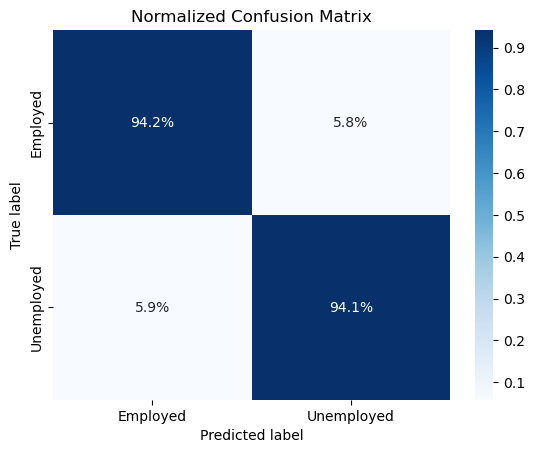

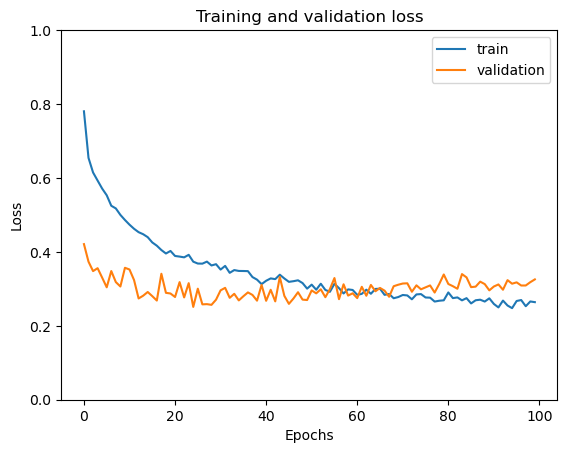

In [225]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [217]:
# GRIDSEARCH FOR OPTIMAL VALUES OF DROPOUT RATE AND WEIGHT DECAY #

In [184]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.regularizers import l2

# Define the base model with hyperparameters to be tuned
def create_model(dropout_rate=0.0, weight_decay=0.0):
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=X.shape[1], activation='relu', kernel_regularizer=l2(weight_decay)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(8, activation='relu', kernel_regularizer=l2(weight_decay)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper for scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=2)

# Define the grid search parameters
dropout_rate = [0.0, 0.25, 0.5]
weight_decay = [0.0, 0.001, 0.01]

# Create the grid search
param_grid = dict(dropout_rate=dropout_rate, weight_decay=weight_decay)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search to the data
grid_result = grid.fit(X, y, class_weight=class_weights)

# Print the best parameters and score
print("Best parameters: {}".format(grid_result.best_params_))
print("Best score: {:.1%}".format(grid_result.best_score_))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/100
947/947 - 2s - loss: 0.7150 - accuracy: 0.8248 - 2s/epoch - 2ms/step
Epoch 2/100
947/947 - 1s - loss: 0.6056 - accuracy: 0.8384 - 1s/epoch - 1ms/step
Epoch 3/100
947/947 - 1s - loss: 0.5688 - accuracy: 0.8448 - 1s/epoch - 1ms/step
Epoch 4/100
947/947 - 1s - loss: 0.5404 - accuracy: 0.8508 - 1s/epoch - 1ms/step
Epoch 5/100
947/947 - 1s - loss: 0.5038 - accuracy: 0.8606 - 1s/epoch - 1ms/step
Epoch 6/100
947/947 - 1s - loss: 0.4746 - accuracy: 0.8685 - 1s/epoch - 1ms/step
Epoch 7/100
947/947 - 1s - loss: 0.4464 - accuracy: 0.8752 - 1s/epoch - 1ms/step
Epoch 8/100
947/947 - 1s - loss: 0.4190 - accuracy: 0.8809 - 1s/epoch - 1ms/step
Epoch 9/100
947/947 - 1s - loss: 0.3914 - accuracy: 0.8904 - 1s/epoch - 1ms/step
Epoch 10/100
947/947 - 1s - loss: 0.3682 - accuracy: 0.8942 - 1s/epoch - 1ms/step
Epoch 11/100
947/947 - 1s - loss: 0.3501 - accuracy: 0.8986 - 1s/epoch - 1ms/step
Epoch 12/100
947/947 - 1s - loss: 0.3296 - accu

In [210]:
# THIS STATES THAT BOTH DROPOUT RATE AND WEIGHT DECAY ARE OPTIMAL WHEN NOT INCLUDED #

## 4.4. Findings

#### Hyperparameter Tuning

Through this it was found that the best optimizer was Adam and that the optimal number of neurons was 64. However when both of these values were trained on a model, the increasing validation loss showed that the accuracy was due to overfitting. The 64 value was implemented and aimed to be improved upon through other methods.

#### Feature Engineering

This was achieved through dimensionality reduction using PCA, however in removing the number of features, the accuracy of the model decreased to around 80%, with no improvments made upon other models.

#### Regularization

Regularization had the most effective impact on improving on the original model, mainly by increasing the accuracy of the Employment class and the overall precision of the model. L2 and Dropout regularisation techniques were both used with slightly better results for the dropout method.

## 4.5. Final Model

The final model that will be used for this is the neural network which consists of 3 layers, where the first and second layers have a dropout regularization of 0.25. The model is trained using the Adam optimiser and class weights have been set to address class imbalance. The model is trained for 100 epochs with a batch size of 32.

The final model has similar recall to the initial model but has a better precision as it predicts the Employment class more accurately.

In [188]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Split data into features and target
X = df_encoded.drop(['unemployed'], axis=1)
y = df_encoded['unemployed']

# Define the model architecture with dropout layers
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights
class_weights = {0: 0.95, 1: 19}

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on training data with validation split
history = model.fit(X, y, epochs=100, batch_size=32, class_weight=class_weights, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

Epoch 1/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.8496 - accuracy: 0.7594 - val_loss: 0.3932 - val_accuracy: 0.8027
Epoch 2/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6708 - accuracy: 0.8128 - val_loss: 0.3038 - val_accuracy: 0.8539
Epoch 3/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.6253 - accuracy: 0.8277 - val_loss: 0.3694 - val_accuracy: 0.8204
Epoch 4/100
1136/1136 [==============================] - 2s 1ms/step - loss: 0.6045 - accuracy: 0.8328 - val_loss: 0.3195 - val_accuracy: 0.8461
Epoch 5/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5746 - accuracy: 0.8392 - val_loss: 0.3525 - val_accuracy: 0.8227
Epoch 6/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5686 - accuracy: 0.8376 - val_loss: 0.3004 - val_accuracy: 0.8504
Epoch 7/100
1136/1136 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.8475 - val_loss: 0.3083 - val_ac

Precision: 42.3%
Recall: 94.4%
F1-score: 58.4%


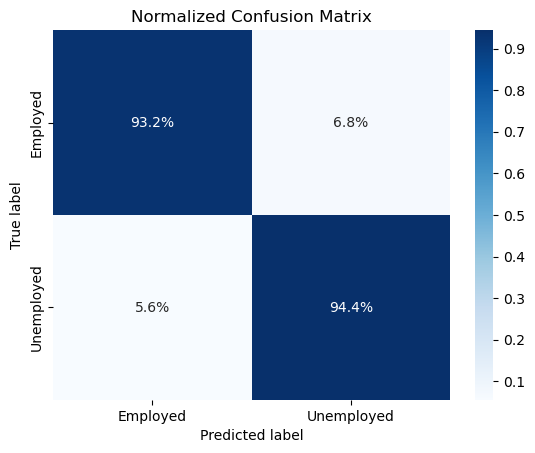

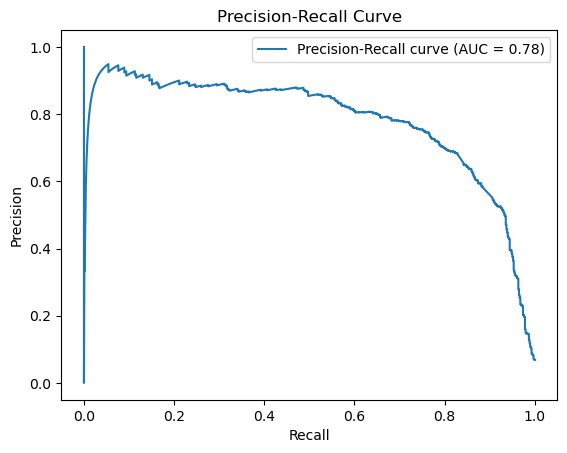

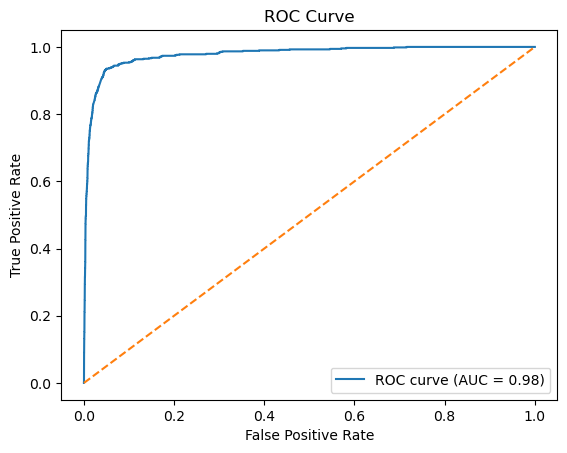

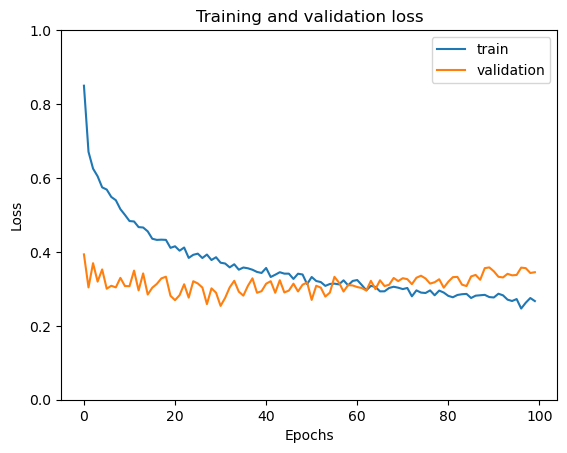

In [189]:
print("Precision: {:.1%}".format(precision))
print("Recall: {:.1%}".format(recall))
print("F1-score: {:.1%}".format(f1))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plot the normalized confusion matrix using Seaborn
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.1%', xticklabels=['Employed', 'Unemployed'], yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Calculate precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Create precision-recall curve plot
plt.plot(recall, precision, label='Precision-Recall curve (AUC = {:.2f})'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Create ROC curve plot
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

<p style="page-break-after:always;"></p>

# 5. Conclusion

A model has been created which performs well in predicting the unemployment status of individuals based on an initial 20 variables, with a recall of 94.4%. This allows us to achieve the ultimate goal, which was to be able to understand how demographic, socioeconomic, and health-related factors can be leveraged to accurately predict an individual's unemployment.

It is important to note that despite this, there are still a large amount of misclassifications (false positives and false negatives) as this is something that would look to be applied across a population-level. Although methods such as hyperparameter tuning and regularization were undertaken to avoid overfitting, the likelihood of overfitting has not been fully eradicated, meaning that the model may not necessarily have the ability to generalise well to new data. 

This model will however give policymakers and government a good basis to explore certain variables in more detail, and use a similar framework to track these in future census iterations. 

<p style="page-break-after:always;"></p>

# 6. References

1 - [UK Data Service. (n.d.). Home. Retrieved March 20, 2023, from https://ukdataservice.ac.uk/]

2 - [Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow, 2nd Edition. O'Reilly Media, Inc.]